In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '5cf3140e-488d-47df-be3e-9c49554d8e46',
}

session = Session()
session.headers.update(headers)

try:
    response = session.get(url, params=parameters)
    data = json.loads(response.text)
    #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
    print(e)

In [2]:
type(data)

dict

In [3]:
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

/var/folders/ks/h__klm051tg5yr4jb1kd33dr0000gn/T/ipykernel_7739/644439384.py:2: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10149,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.934180e+07,1.934180e+07,False,NaN,1,NaN,NaN,None,2023-04-09T19:38:00.000Z,28116.684957,1.066913e+10,14.1860,0.622308,0.693468,0.255217,40.870031,22.997187,62.073808,5.438273e+11,45.9846,5.904504e+11,None,2023-04-09T19:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-09 19:39:47.745782
1,1027,Ethereum,ETH,ethereum,6710,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.204578e+08,1.204578e+08,False,NaN,2,NaN,NaN,None,2023-04-09T19:38:00.000Z,1855.966998,6.005499e+09,16.2928,0.683036,0.130466,3.815771,31.215337,12.773137,39.140560,2.235657e+11,18.8790,2.235657e+11,None,2023-04-09T19:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-09 19:39:47.745782
2,825,Tether,USDT,tether,50938,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.021054e+10,8.309174e+10,False,NaN,3,NaN,NaN,None,2023-04-09T19:38:00.000Z,1.000383,1.879033e+10,7.5097,-0.012118,-0.012511,0.027019,0.031471,0.024480,0.040790,8.024125e+10,6.7760,8.312355e+10,None,2023-04-09T19:38:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-04-09 19:39:47.745782
3,1839,BNB,BNB,bnb,1249,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.578866e+08,1.578866e+08,False,NaN,4,NaN,NaN,None,2023-04-09T19:38:00.000Z,312.042923,4.590370e+08,0.0079,0.303470,0.394327,-0.123969,12.969508,-4.370895,12.207189,4.926739e+10,4.1624,4.926739e+10,None,2023-04-09T19:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-09 19:39:47.745782
4,3408,USD Coin,USDC,usd-coin,11589,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.260046e+10,3.260046e+10,False,NaN,5,NaN,NaN,None,2023-04-09T19:38:00.000Z,0.999809,2.426437e+09,5.9447,-0.008012,-0.012082,0.031170,-0.023660,-0.014669,-0.023064,3.259424e+10,2.7524,3.259424e+10,None,2023-04-09T19:38:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-04-09 19:39:47.745782
5,52,XRP,XRP,xrp,928,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.168847e+10,9.998901e+10,False,NaN,6,NaN,NaN,None,2023-04-09T19:38:00.000Z,0.505673,5.416041e+08,-14.9240,0.596956,0.195131,-3.247601,37.872295,27.230662,42.297303,2.613746e+10,2.2083,5.056729e+10,None,2023-04-09T19:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-09 19:39:47.745782
6,2010,Cardano,ADA,cardano,764,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.476292e+10,3.566069e+10,False,NaN,7,NaN,NaN,None,2023-04-09T19:38:00.000Z,0.391567,1.892866e+08,-8.4962,0.874603,1.778389,2.979079,26.465994,-0.286128,23.519615,1.361201e+10,1.1495,1.762051e+10,None,2023-04-09T19:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-09 19:39:47.745782
7,74,Dogecoin,DOGE,dogecoin,681,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.388703e+11,1.388703e+11,False,NaN,8,NaN,NaN,None,2023-04-09T19:38:00.000Z,0.083308,4.700611e+08,-5.1144,0.241609,2.519309,4.767047,27.697650,-7.158230,7.421124,1.156900e+10,0.9769,1.156900e+10,None,2023-04-09T19:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-09 19:39:47.745782
8,3890,Polygon,MATIC,polygon,649,2019-04-28T00:00:00.000Z,"[platform, enterprise-solutions, zero-knowledg...",1.000000e+10,9.

In [40]:

def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '5cf3140e-488d-47df-be3e-9c49554d8e46',
    }

    session = Session()
    session.headers.update(headers)

    try:
        response = session.get(url, params=parameters)
        data = json.loads(response.text)
        #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
        print(e)
        
    
    df2 = pd.json_normalize(data['data'])
    df2['timestamp'] = pd.to_datetime('now')
    df = df.append(df2)
    
    if not os.path.isfile(r'/Users/alinanary/API.csv'):
        df.to_csv(r'/Users/alinanary/API.csv', header='column_names')
    else:
        df.to_csv(r'/Users/alinanary/API.csv', mode='a', header=False)




In [41]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed!')
    sleep(60) #sleep for 1 minute
exit()

/var/folders/ks/h__klm051tg5yr4jb1kd33dr0000gn/T/ipykernel_7739/3422541928.py:26: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df2['timestamp'] = pd.to_datetime('now')
/var/folders/ks/h__klm051tg5yr4jb1kd33dr0000gn/T/ipykernel_7739/3422541928.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner completed!


/var/folders/ks/h__klm051tg5yr4jb1kd33dr0000gn/T/ipykernel_7739/3422541928.py:26: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df2['timestamp'] = pd.to_datetime('now')
/var/folders/ks/h__klm051tg5yr4jb1kd33dr0000gn/T/ipykernel_7739/3422541928.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner completed!


/var/folders/ks/h__klm051tg5yr4jb1kd33dr0000gn/T/ipykernel_7739/3422541928.py:26: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df2['timestamp'] = pd.to_datetime('now')
/var/folders/ks/h__klm051tg5yr4jb1kd33dr0000gn/T/ipykernel_7739/3422541928.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner completed!


/var/folders/ks/h__klm051tg5yr4jb1kd33dr0000gn/T/ipykernel_7739/3422541928.py:26: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df2['timestamp'] = pd.to_datetime('now')
/var/folders/ks/h__klm051tg5yr4jb1kd33dr0000gn/T/ipykernel_7739/3422541928.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner completed!


/var/folders/ks/h__klm051tg5yr4jb1kd33dr0000gn/T/ipykernel_7739/3422541928.py:26: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df2['timestamp'] = pd.to_datetime('now')
/var/folders/ks/h__klm051tg5yr4jb1kd33dr0000gn/T/ipykernel_7739/3422541928.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner completed!


/var/folders/ks/h__klm051tg5yr4jb1kd33dr0000gn/T/ipykernel_7739/3422541928.py:26: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df2['timestamp'] = pd.to_datetime('now')
/var/folders/ks/h__klm051tg5yr4jb1kd33dr0000gn/T/ipykernel_7739/3422541928.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner completed!


KeyboardInterrupt: 

In [42]:
df72 = pd.read_csv(r'/Users/alinanary/API.csv')
df72

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,10149,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19341800.00000,19341800.00000,False,NaN,1,NaN,NaN,NaN,2023-04-09T19:38:00.000Z,28116.68496,10669133201.02084,14.18600,0.62231,0.69347,0.25522,40.87003,22.99719,62.07381,543827297100.90167,45.98460,590450384096.56006,NaN,2023-04-09T19:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-09 19:39:47.745782
1,1,1027,Ethereum,ETH,ethereum,6710,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120457776.00000,120457776.00000,False,NaN,2,NaN,NaN,NaN,2023-04-09T19:38:00.000Z,1855.96700,6005499052.84430,16.29280,0.68304,0.13047,3.81577,31.21534,12.77314,39.14056,223565656963.60867,18.87900,223565656963.60999,NaN,2023-04-09T19:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-09 19:39:47.745782
2,2,825,Tether,USDT,tether,50938,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,80210538011.07312,83091735571.85529,False,NaN,3,NaN,NaN,NaN,2023-04-09T19:38:00.000Z,1.00038,18790325526.71026,7.50970,-0.01212,-0.01251,0.02702,0.03147,0.02448,0.04079,80241251129.49451,6.77600,83123551918.91000,NaN,2023-04-09T19:38:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-04-09 19:39:47.745782
3,3,1839,BNB,BNB,bnb,1249,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,157886594.44517,157886594.44517,False,NaN,4,NaN,NaN,NaN,2023-04-09T19:38:00.000Z,312.04292,459036997.86449,0.00790,0.30347,0.39433,-0.12397,12.96951,-4.37090,12.20719,49267394393.90601,4.16240,49267394393.91000,NaN,2023-04-09T19:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-09 19:39:47.745782
4,4,3408,USD Coin,USDC,usd-coin,11589,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,32600464084.04197,32600464084.04197,False,NaN,5,NaN,NaN,NaN,2023-04-09T19:38:00.000Z,0.99981,2426436748.91133,5.94470,-0.00801,-0.01208,0.03117,-0.02366,-0.01467,-0.02306,32594235827.17945,2.75240,32594235827.18000,NaN,2023-04-09T19:38:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-04-09 19:39:47.745782
5,5,52,XRP,XRP,xrp,928,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,51688470797.00000,99989014677.00000,False,NaN,6,NaN,NaN,NaN,2023-04-09T19:38:00.000Z,0.50567,541604106.03783,-14.92400,0.59696,0.19513,-3.24760,37.87229,27.23066,42.29730,26137456426.09969,2.20830,50567285166.46000,NaN,2023-04-09T19:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-09 19:39:47.745782
6,6,2010,Cardano,ADA,cardano,764,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",45000000000.00000,34762918962.48700,35660688966.54200,False,NaN,7,NaN,NaN,NaN,2023-04-09T19:38:00.000Z,0.39157,189286603.82332,-8.49620,0.87460,1.77839,2.97908,26.46599,-0.28613,23.51962,13612008918.95386,1.14950,17620511154.83000,NaN,2023-04-09T19:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-09 19:39:47.745782
7,7,74,Dogecoin,DOGE,dogecoin,681,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,138870306383.70520,138870306383.70520,False,NaN,8,NaN,NaN,NaN,2023-04-09T19:38:00.000Z,0.08331,470061098.31086,-5.11440,0.24161,2.51931,4.76705,27.69765,-7.15823,7.42112,11568997218.75058,0.97690,11568997218.75000,NaN,2023-04-09T19:38:00.000

In [43]:
# Floating-point display format configuration

pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [9]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10149,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19341800.00000,19341800.00000,False,NaN,1,NaN,NaN,None,2023-04-09T19:38:00.000Z,28116.68496,10669133201.02085,14.18600,0.62231,0.69347,0.25522,40.87003,22.99719,62.07381,543827297100.90173,45.98460,590450384096.56006,None,2023-04-09T19:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-09 19:39:47.745782
1,1027,Ethereum,ETH,ethereum,6710,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120457776.00000,120457776.00000,False,NaN,2,NaN,NaN,None,2023-04-09T19:38:00.000Z,1855.96700,6005499052.84430,16.29280,0.68304,0.13047,3.81577,31.21534,12.77314,39.14056,223565656963.60867,18.87900,223565656963.60999,None,2023-04-09T19:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-09 19:39:47.745782
2,825,Tether,USDT,tether,50938,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,80210538011.07312,83091735571.85529,False,NaN,3,NaN,NaN,None,2023-04-09T19:38:00.000Z,1.00038,18790325526.71027,7.50970,-0.01212,-0.01251,0.02702,0.03147,0.02448,0.04079,80241251129.49451,6.77600,83123551918.91000,None,2023-04-09T19:38:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-04-09 19:39:47.745782
3,1839,BNB,BNB,bnb,1249,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,157886594.44517,157886594.44517,False,NaN,4,NaN,NaN,None,2023-04-09T19:38:00.000Z,312.04292,459036997.86449,0.00790,0.30347,0.39433,-0.12397,12.96951,-4.37090,12.20719,49267394393.90601,4.16240,49267394393.91000,None,2023-04-09T19:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-09 19:39:47.745782
4,3408,USD Coin,USDC,usd-coin,11589,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,32600464084.04197,32600464084.04197,False,NaN,5,NaN,NaN,None,2023-04-09T19:38:00.000Z,0.99981,2426436748.91133,5.94470,-0.00801,-0.01208,0.03117,-0.02366,-0.01467,-0.02306,32594235827.17945,2.75240,32594235827.18000,None,2023-04-09T19:38:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-04-09 19:39:47.745782
5,52,XRP,XRP,xrp,928,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,51688470797.00000,99989014677.00000,False,NaN,6,NaN,NaN,None,2023-04-09T19:38:00.000Z,0.50567,541604106.03783,-14.92400,0.59696,0.19513,-3.24760,37.87229,27.23066,42.29730,26137456426.09969,2.20830,50567285166.46000,None,2023-04-09T19:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-09 19:39:47.745782
6,2010,Cardano,ADA,cardano,764,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,34762918962.48700,35660688966.54200,False,NaN,7,NaN,NaN,None,2023-04-09T19:38:00.000Z,0.39157,189286603.82332,-8.49620,0.87460,1.77839,2.97908,26.46599,-0.28613,23.51962,13612008918.95387,1.14950,17620511154.83000,None,2023-04-09T19:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-04-09 19:39:47.745782
7,74,Dogecoin,DOGE,dogecoin,681,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,138870306383.70520,138870306383.70520,False,NaN,8,NaN,NaN,None,2023-04-09T19:38:00.000Z,0.08331,470061098.31086,-5.11440,0.24161,2.51931,4.76705,27.69765,-7.15823,7.42112,11568997218.75058,0.97690,11568997218.75000,None,2023-04-09T19:38:00.000Z,NaN,NaN,N

In [53]:
# Coin trends over time

df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.volume_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.volume_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.12539,15.53962,0.33903,40.61024,23.00551,62.92772
Ethereum,-0.14872,17.51207,3.95845,30.75364,12.87038,39.94906
Tether,0.00227,7.60621,0.03848,0.03787,0.03991,0.05269
BNB,0.00372,-0.36343,-0.16282,12.64943,-4.30771,13.53319
USD Coin,-0.00099,7.21767,0.03693,-0.02277,-0.01195,-0.00658
XRP,-0.17838,-14.64355,-2.72234,36.88877,27.33254,43.10351
Cardano,-0.23076,-7.34135,2.82346,25.69326,-0.34059,24.01657
Dogecoin,-0.28899,-5.83141,4.68932,26.97622,-7.08110,8.79992
Polygon,-0.12049,22.29408,0.73436,4.88671,-16.60039,29.49835


In [54]:
# Stack columns into a single column

df4 = df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h     -0.12539
             quote.USD.volume_change_24h     15.53962
             quote.USD.percent_change_7d      0.33903
             quote.USD.percent_change_30d    40.61024
             quote.USD.percent_change_60d    23.00551
             quote.USD.percent_change_90d    62.92772
Ethereum     quote.USD.percent_change_1h     -0.14872
             quote.USD.volume_change_24h     17.51207
             quote.USD.percent_change_7d      3.95845
             quote.USD.percent_change_30d    30.75364
             quote.USD.percent_change_60d    12.87038
             quote.USD.percent_change_90d    39.94906
Tether       quote.USD.percent_change_1h      0.00227
             quote.USD.volume_change_24h      7.60621
             quote.USD.percent_change_7d      0.03848
             quote.USD.percent_change_30d     0.03787
             quote.USD.percent_change_60d     0.03991
             quote.USD.percent_change_90

In [55]:
df5 = df4.to_frame(name='values')
df5

values
name                                              
Bitcoin     quote.USD.percent_change_1h   -0.12539
            quote.USD.volume_change_24h   15.53962
            quote.USD.percent_change_7d    0.33903
            quote.USD.percent_change_30d  40.61024
            quote.USD.percent_change_60d  23.00551
            quote.USD.percent_change_90d  62.92772
Ethereum    quote.USD.percent_change_1h   -0.14872
            quote.USD.volume_change_24h   17.51207
            quote.USD.percent_change_7d    3.95845
            quote.USD.percent_change_30d  30.75364
            quote.USD.percent_change_60d  12.87038
            quote.USD.percent_change_90d  39.94906
Tether      quote.USD.percent_change_1h    0.00227
            quote.USD.volume_change_24h    7.60621
            quote.USD.percent_change_7d    0.03848
            quote.USD.percent_change_30d   0.03787
            quote.USD.percent_change_60d   0.03991
            quote.USD.percent_change_90d   0.05269
BNB         quote.USD.percent_change_1h    0.00372
            quote.USD.volume_change_24h   -0.36343
            quote.USD.percent_change_7d   -0.16282
            quote.USD.percent_change_30d  12.64943
            quote.USD.percent_change_60d  -4.30771
            quote.USD.percent_change_90d  13.53319
USD Coin    quote.USD.percent_change_1h   -0.00099
            quote.USD.volume_change_24h    7.21767
            quote.USD.percent_change_7d    0.03693
            quote.USD.percent_change_30d  -0.02277
            quote.USD.percent_change_60d  -0.01195
            quote.USD.percent_change_90d  -0.00658
XRP         quote.USD.percent_change_1h   -0.17838
            quote.USD.volume_change_24h  -14.64355
            quote.USD.percent_change_7d   -2.72234
            quote.USD.percent_change_30d  36.88877
            quote.USD.percent_change_60d  27.33254
            quote.USD.percent_change_90d  43.10351
Cardano     quote.USD.percent_change_1h   -0.23076
            quote.USD.volume_change_24h   -7.34135
            quote.USD.percent_change_7d    2.82346
            quote.USD.percent_change_30d  25.69326
            quote.USD.percent_change_60d  -0.34059
            quote.USD.percent_change_90d  24.01657
Dogecoin    quote.USD.percent_change_1h   -0.28899
            quote.USD.volume_change_24h   -5.83141
            quote.USD.percent_change_7d    4.68932
            quote.USD.percent_change_30d  26.97622
            quote.USD.percent_change_60d  -7.08110
            quote.USD.percent_change_90d   8.79992
Polygon     quote.USD.percent_change_1h   -0.12049
            quote.USD.volume_change_24h   22.29408
            quote.USD.percent_change_7d    0.73436
            quote.USD.percent_change_30d   4.88671
            quote.USD.percent_change_60d -16.60039
            quote.USD.percent_change_90d  29.49835
Solana      quote.USD.percent_change_1h   -0.24009
            quote.USD.volume_change_24h   15.61971
            quote.USD.percent_change_7d   -0.84903
            quote.USD.percent_change_30d  14.29294
            quote.USD.percent_change_60d -11.91777
            quote.USD.percent_change_90d  24.31193
Polkadot    quote.USD.percent_change_1h    0.06126
            quote.USD.volume_change_24h    3.88447
            quote.USD.percent_change_7d   -0.95198
            quote.USD.percent_change_30d  12.13747
            quote.USD.percent_change_60d  -7.60094
            quote.USD.percent_change_90d  25.87241
Binance USD quote.USD.percent_change_1h    0.00209
            quote.USD.volume_change_24h    6.79885
            quote.USD.percent_change_7d    0.02638
            quote.USD.percent_change_30d  -0.08017
            quote.USD.percent_change_60d  -0.02726
            quote.USD.percent_change_90d  -0.01115
Litecoin    quote.USD.percent_change_1h   -0.14614
            quote.USD.volume_change_24h    1.75710
            quote.USD.percent_change_7d   -0.86657
            quote.USD.percent_change_30d  26.20491
            quote.USD.percent_change_60d  -8.50945
            quo

In [58]:
index = pd.Index(range(90))


# Set the above DataFrame index object as the index using set_index() function
df6 = df5.set_index(index)
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.12539
1,Bitcoin,quote.USD.volume_change_24h,15.53962
2,Bitcoin,quote.USD.percent_change_7d,0.33903
3,Bitcoin,quote.USD.percent_change_30d,40.61024
4,Bitcoin,quote.USD.percent_change_60d,23.00551
5,Bitcoin,quote.USD.percent_change_90d,62.92772
6,Ethereum,quote.USD.percent_change_1h,-0.14872
7,Ethereum,quote.USD.volume_change_24h,17.51207
8,Ethereum,quote.USD.percent_change_7d,3.95845
9,Ethereum,quote.USD.percent_change_30d,30.75364


In [59]:
# Change the column name

df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.12539
1,Bitcoin,quote.USD.volume_change_24h,15.53962
2,Bitcoin,quote.USD.percent_change_7d,0.33903
3,Bitcoin,quote.USD.percent_change_30d,40.61024
4,Bitcoin,quote.USD.percent_change_60d,23.00551
5,Bitcoin,quote.USD.percent_change_90d,62.92772
6,Ethereum,quote.USD.percent_change_1h,-0.14872
7,Ethereum,quote.USD.volume_change_24h,17.51207
8,Ethereum,quote.USD.percent_change_7d,3.95845
9,Ethereum,quote.USD.percent_change_30d,30.75364


In [61]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h', 'quote.USD.volume_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d'],['1h', '24h', '7d', '30d', '60d', '90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,-0.12539
1,Bitcoin,24h,15.53962
2,Bitcoin,7d,0.33903
3,Bitcoin,30d,40.61024
4,Bitcoin,60d,23.00551
5,Bitcoin,90d,62.92772
6,Ethereum,1h,-0.14872
7,Ethereum,24h,17.51207
8,Ethereum,7d,3.95845
9,Ethereum,30d,30.75364


In [62]:
# Import libraries to create data visualizations in Python

import seaborn as sns
import matplotlib.pyplot as plt

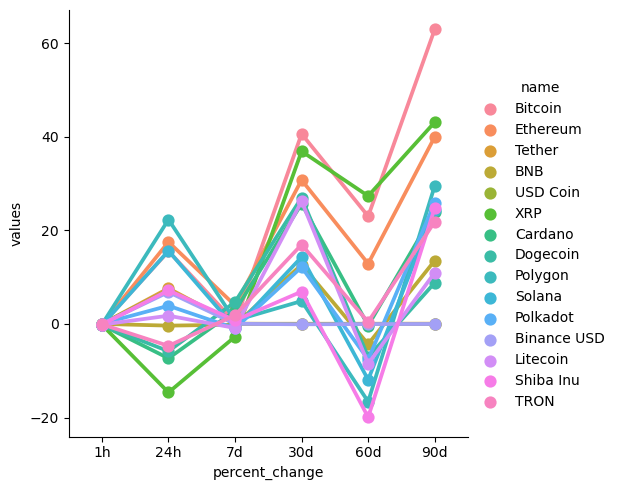

In [63]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')


In [64]:
df10 = df[['name', 'quote.USD.price', 'timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,28116.68496,2023-04-09 19:39:47.745782
0,Bitcoin,28116.68496,2023-04-09 19:40:15.222433
0,Bitcoin,28132.35340,2023-04-09 20:30:35.830943
0,Bitcoin,28132.35340,2023-04-09 20:30:56.865342
0,Bitcoin,28132.35340,2023-04-09 20:31:34.232025
0,Bitcoin,28150.11987,2023-04-09 20:32:34.921680
0,Bitcoin,28146.91476,2023-04-09 20:33:35.344588
0,Bitcoin,28145.02266,2023-04-09 20:34:35.983460
0,Bitcoin,28141.83387,2023-04-09 20:35:36.421764
0,Bitcoin,28148.11211,2023-04-09 20:36:36.818072


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

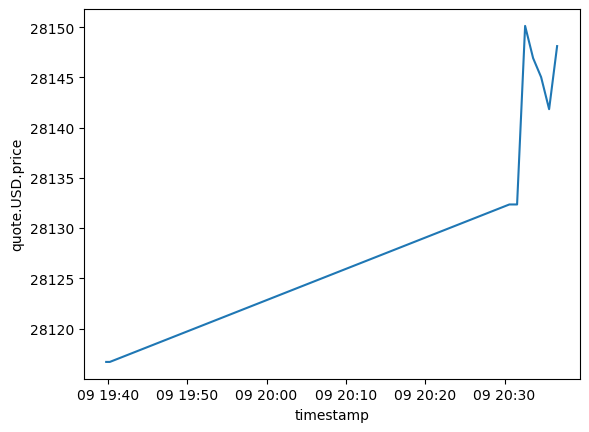

In [65]:
sns.lineplot(x='timestamp', y='quote.USD.price', data=df10)